In [86]:
pip install opencv-python matplotlib numpy


In [87]:
# Cartoonify Image Project
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [88]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [89]:

# Step 1: Read Image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/puppy.jpg')


In [90]:
img = cv2.resize(img, (600, 600))

# Convert once to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



In [91]:
# ---------- Step 1: Edge Detection ----------
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.medianBlur(gray, 7)
edges = cv2.adaptiveThreshold(gray_blur, 255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, 9, 9)



In [92]:
# ---------- Step 2: Smooth Colors (still BGR) ----------
smooth = cv2.bilateralFilter(img, d=9, sigmaColor=200, sigmaSpace=200)
smooth_rgb = cv2.cvtColor(smooth, cv2.COLOR_BGR2RGB)   # convert to RGB



In [93]:
# ---------- Step 3: Cartoon Avatar ----------
avatar = cv2.bitwise_and(smooth, smooth, mask=edges)
avatar_rgb = cv2.cvtColor(avatar, cv2.COLOR_BGR2RGB)   # convert to RGB



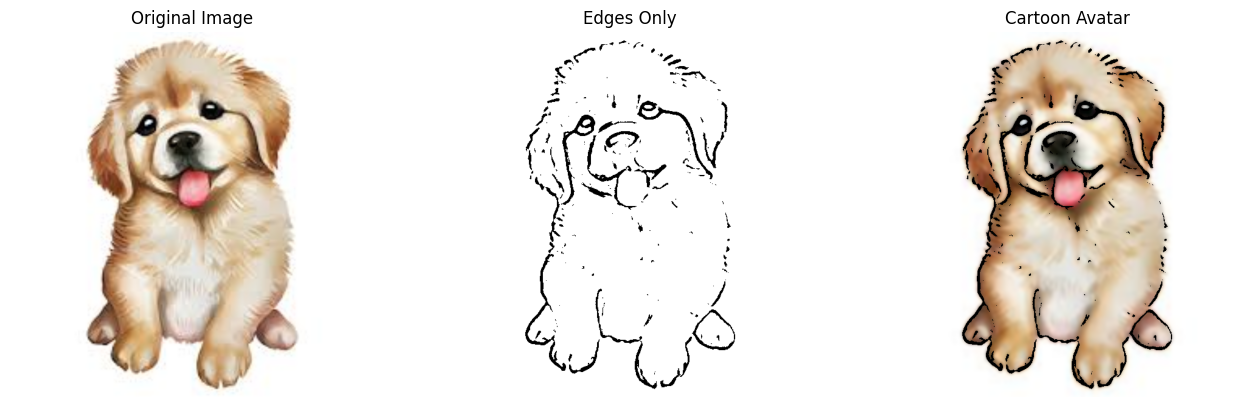

In [94]:
# ---------- Show Results ----------
plt.figure(figsize=(16,10))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Edges Only")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Cartoon Avatar")
plt.imshow(avatar_rgb)
plt.axis("off")

plt.show()